In [46]:
import hail as hl
import matplotlib.pyplot as plt

In [49]:
ls =[]
for i in range(1,23):
    ref = hl.import_table(f'gs://nbaya/split/gcta/ldscores/eur_w_ld_chr/{i}.l2.ldscore.gz',force=True,impute=True).key_by('SNP')
    ref = ref.rename({'L2':'L2_eur'})
    insample = hl.import_table(f'gs://nbaya/split/gcta/ldscores/{i}.l2.ldscore.gz',force=True,impute=True).key_by('SNP')
    combined = ref.filter(hl.is_defined(insample[ref.SNP]))
    combined = combined.annotate(L2_insample=insample[combined.SNP].L2)
    df = combined.to_pandas()
    ls.append(df)

2019-05-30 18:20:12 Hail: INFO: Reading table to impute column types
2019-05-30 18:20:12 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'CM' as type 'float64' (imputed)
  Loading column 'MAF' as type 'float64' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:20:13 Hail: INFO: Reading table to impute column types
2019-05-30 18:20:13 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:20:14 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:20:14 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:20:14 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:20:23 Ha

2019-05-30 18:21:11 Hail: INFO: Reading table to impute column types
2019-05-30 18:21:12 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:21:12 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:13 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:13 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:16 Hail: INFO: Reading table to impute column types
2019-05-30 18:21:16 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'CM' as type 'float64' (imputed)
  Loading column 'MAF' as type 'float64' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:21:17 Ha

2019-05-30 18:21:53 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:53 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:55 Hail: INFO: Reading table to impute column types
2019-05-30 18:21:56 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'CM' as type 'float64' (imputed)
  Loading column 'MAF' as type 'float64' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:21:56 Hail: INFO: Reading table to impute column types
2019-05-30 18:21:56 Hail: INFO: Finished type imputation
  Loading column 'CHR' as type 'int32' (imputed)
  Loading column 'SNP' as type 'str' (imputed)
  Loading column 'BP' as type 'int32' (imputed)
  Loading column 'L2' as type 'float64' (imputed)
2019-05-30 18:21:57 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-05-30 18:21:57 Ha

In [44]:
combined.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Row fields:
    'CHR': int32 
    'SNP': str 
    'BP': int32 
    'CM': float64 
    'MAF': float64 
    'L2_eur': float64 
    'L2_insample': float64 
----------------------------------------
Key: ['SNP']
----------------------------------------


In [65]:
for i in range(1,23):
    df = ls[i-1]
    fig,ax=plt.subplots(figsize=(6,4))
    ax.plot(df.L2_eur,df.L2_insample,'.')
    ax.plot([0,max(max(df.L2_eur),max(df.L2_insample))],[0,max(max(df.L2_eur),max(df.L2_insample))],'k--')
    plt.title(f'chr {i}\ntotal: {len(df)} SNPs\nproportion of 1KG>20kUKB: {round(len(df[df.L2_eur>df.L2_insample])/len(df),3)}')
    plt.xlabel('1000 Genomes LD Scores')
    plt.ylabel('20k sample UKB LD Scores')
    plt.tight_layout()
    fig=plt.gcf()
    fig.savefig(f'/home/nbaya/chr{i}_ldscores.png',dpi=600)
    plt.close()

In [69]:
df = ls[0]
for i in range(1,22):
    df = df.append(ls[i])

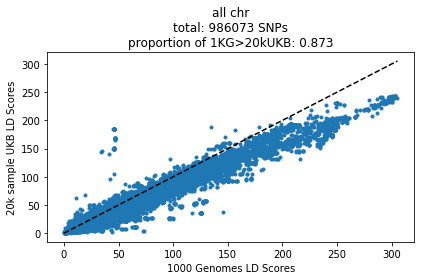

In [73]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(df.L2_eur,df.L2_insample,'.')
ax.plot([0,max(max(df.L2_eur),max(df.L2_insample))],[0,max(max(df.L2_eur),max(df.L2_insample))],'k--')
plt.title(f'all chr\ntotal: {len(df)} SNPs\nproportion of 1KG>20kUKB: {round(len(df[df.L2_eur>df.L2_insample])/len(df),3)}')
plt.xlabel('1000 Genomes LD Scores')
plt.ylabel('20k sample UKB LD Scores')
plt.tight_layout()
fig=plt.gcf()
fig.savefig(f'/home/nbaya/all_chr_ldscores.png',dpi=600)


In [75]:
import scipy.stats as stats
stats.pearsonr(df.L2_eur, df.L2_insample)

(0.982767665260362, 0.0)